In [1]:
from qiskit_ibm_runtime.estimator import Estimator

from QuditsOnQubits import QuditsOnQubits
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np
from matplotlib import pyplot as plt
from qiskit.quantum_info import Statevector
from qiskit.synthesis import TwoQubitWeylDecomposition

In [2]:
ghz_circ = QuditsOnQubits().circuit
ghz_circ.remove_final_measurements()

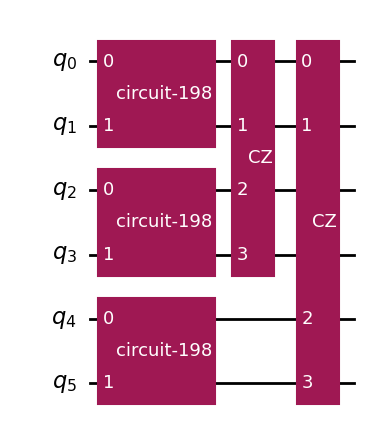

In [3]:
ghz_circ.draw('mpl')

In [4]:
omega = np.exp(2*np.pi*1.j/3)
Z = [[1, 0, 0, 0], [0, omega, 0, 0], [0, 0, omega*omega, 0], [0, 0, 0, 1]]
ZgateQutrit = TwoQubitWeylDecomposition(Z).circuit()
X = [[0,0,1,0], [1,0,0,0], [0,1,0,0],[0,0,0,1]]
XgateQutrit = TwoQubitWeylDecomposition(X).circuit()

def A(n):
    Aqc = QuantumCircuit(2)
    Aqc.append(XgateQutrit, [0, 1])
    for i in range(n):
        Aqc.append(ZgateQutrit, [0, 1])
    return Aqc

observable = [[A(0), A(0), A(0)], [A(0), A(0), A(1)], [A(0), A(1), A(0)], [A(0), A(1), A(1)], [A(1), A(0), A(0)], [A(1), A(0), A(1)], [A(1), A(1), A(0)], [A(1), A(1), A(1)]]

circuits = []

for i in range(8):
    tc = QuantumCircuit(6)
    tc.append(observable[i][0], [0, 1])
    tc.append(observable[i][1], [2, 3])
    tc.append(observable[i][2], [4, 5])
    circuits.append(tc)

In [5]:
ghz_circ.append(circuits[0], [0, 1, 2, 3, 4, 5])

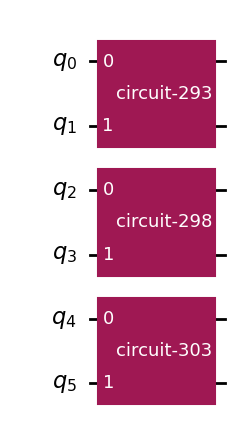

In [6]:
circuits[7].draw('mpl')

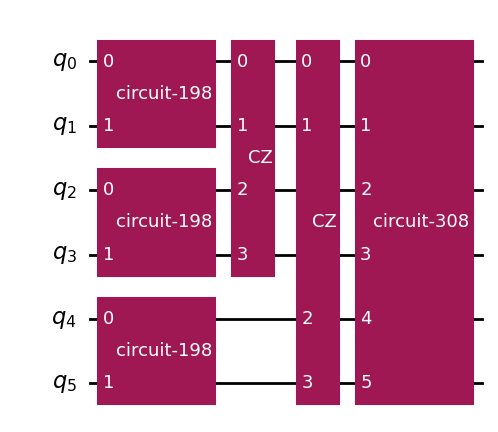

In [7]:
ghz_circ.draw('mpl')

In [8]:
distrib = Statevector.from_instruction(ghz_circ).probabilities_dict()

In [9]:
distrib

{np.str_('000000'): np.float64(0.037037037037037104),
 np.str_('000001'): np.float64(0.03703703703703688),
 np.str_('000010'): np.float64(0.0370370370370374),
 np.str_('000011'): np.float64(9.559071593415035e-31),
 np.str_('000100'): np.float64(0.03703703703703687),
 np.str_('000101'): np.float64(0.03703703703703665),
 np.str_('000110'): np.float64(0.03703703703703714),
 np.str_('000111'): np.float64(1.0140840114849544e-30),
 np.str_('001000'): np.float64(0.03703703703703732),
 np.str_('001001'): np.float64(0.037037037037037125),
 np.str_('001010'): np.float64(0.0370370370370376),
 np.str_('001011'): np.float64(9.180884129904558e-31),
 np.str_('001100'): np.float64(1.048823419699146e-30),
 np.str_('001101'): np.float64(8.662049208438354e-31),
 np.str_('001110'): np.float64(9.685333487846201e-31),
 np.str_('001111'): np.float64(2.414167508545535e-59),
 np.str_('010000'): np.float64(0.03703703703703686),
 np.str_('010001'): np.float64(0.037037037037036674),
 np.str_('010010'): np.float64

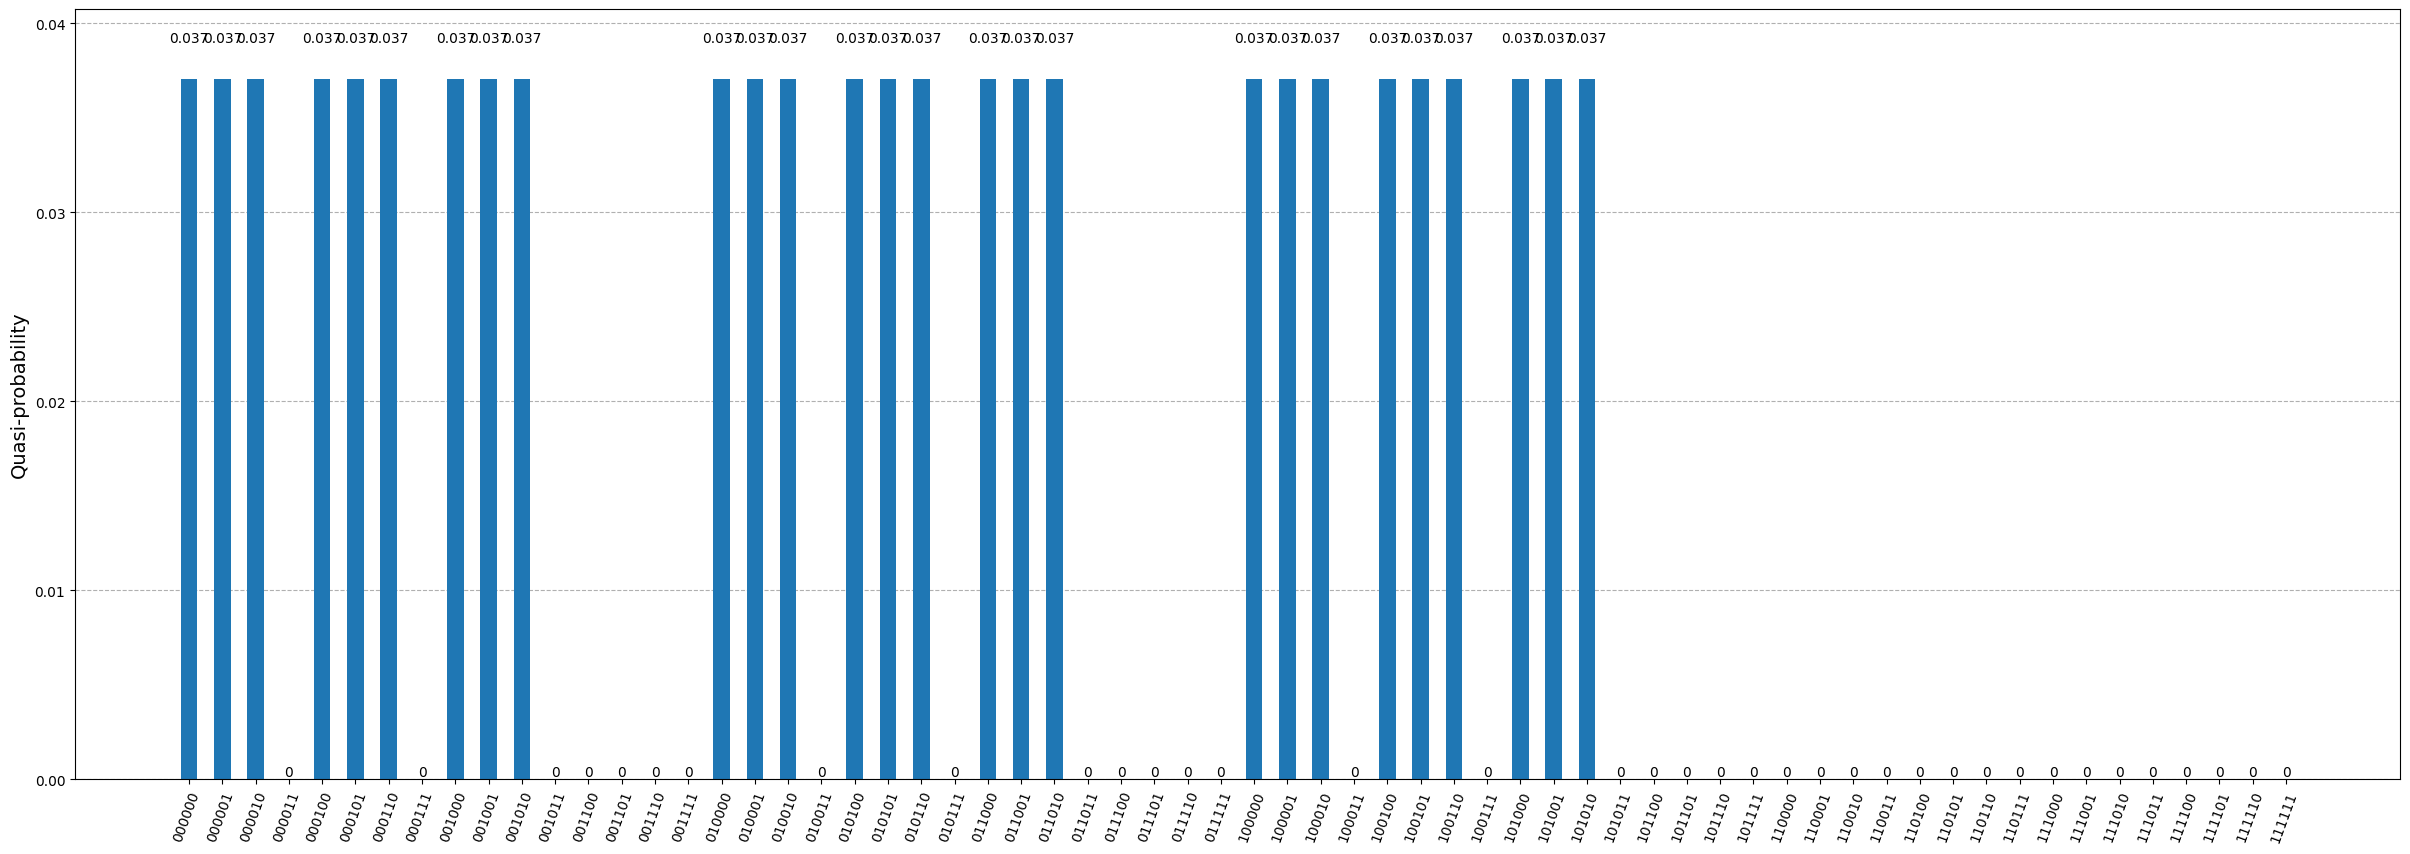

In [10]:
from qiskit.visualization import plot_histogram
plot_histogram(distrib, figsize=(30,10))

In [5]:
omega = np.exp(2*np.pi*1.j/3)
Z = [[1, 0, 0, 0], [0, omega, 0, 0], [0, 0, omega*omega, 0], [0, 0, 0, 1]]
X = [[0,0,1,0], [1,0,0,0], [0,1,0,0],[0,0,0,1]]

In [12]:
Ozero = np.dot(np.identity(4), X)
O1 = np.dot(Z, X)
O2 = np.dot(np.dot(Z, Z), X)

In [13]:
A10 = 1/np.sqrt(3) * (Ozero + O1 + O2)
A11 = 1/np.sqrt(3) * (Ozero + omega*omega*O1 + omega*O2)

In [14]:
Z3 = np.kron(np.kron(np.identity(4), np.identity(4)), Z)
Z2 = np.kron(np.kron(np.identity(4), Z), np.identity(4))
X2 = np.kron(np.kron(np.identity(4), X), np.identity(4))
X3 = np.kron(np.kron(np.identity(4), np.identity(4)), X)

In [15]:
a0 = (A10 + A11)
a1 = A10 - A11

In [16]:
a0

array([[0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        1.73205081e+00+1.92296269e-16j, 0.00000000e+00+0.00000000e+00j],
       [1.73205081e+00-5.33950781e-16j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 2.56395025e-16+8.97382587e-16j,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, 1.73205081e+00+1.92296269e-16j]])

In [17]:
b1 = (np.kron(a0, Z2), Z3)

In [18]:
b2 = np.kron(a1, (np.kron(X2, Z3) + np.kron(Z2, X3)))

In [19]:
b2

array([[ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j, ...,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j, ...,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j, ...,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       ...,
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j, ..., -0.8660254 +1.50000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j, ...,  1.73205081-1.92296269e-16j,
        -0.8660254 -1.50000000e+00j

In [20]:
Ig = 2/np.sqrt(3) * (np.kron(a0, np.kron(Z, Z))) + 1/np.sqrt(3) * (np.kron(a1, np.kron(X, Z) + np.kron(Z, X)))

In [21]:
op = Statevector(ghz_circ).to_operator()

In [22]:
Ig.dot(op)

array([[-7.40740741e-02+6.41500299e-002j,
         9.25925926e-02+3.20750150e-002j,
        -1.85185185e-02-9.62250449e-002j, ...,
        -2.23843156e-30+4.94410161e-031j,
        -2.60193368e-30+2.27582041e-031j,
         6.49794365e-45+9.38673068e-045j],
       [-7.40740741e-02-6.41500299e-002j,
        -1.85185185e-02+9.62250449e-002j,
         9.25925926e-02-3.20750150e-002j, ...,
        -8.09115090e-31-2.14484265e-030j,
        -5.96952615e-31-2.54273475e-030j,
        -8.36217631e-45+7.77225784e-045j],
       [ 3.70370370e-02+4.53185632e-017j,
        -1.85185185e-02-3.20750150e-002j,
        -1.85185185e-02+3.20750150e-002j, ...,
         7.61886661e-31+4.12608123e-031j,
         7.99721573e-31+5.78788178e-031j,
         4.66058163e-46-4.28974713e-045j],
       ...,
       [ 8.72220412e-31+2.17519562e-030j,
         1.44766446e-30-1.84296285e-030j,
        -2.31988487e-30-3.32232777e-031j, ...,
        -6.29019772e-60+5.44627195e-059j,
        -1.51589888e-59+6.05983066e-059j,

In [23]:
expval = (op.conjugate()).dot(Ig.dot(op))

In [24]:
op = op.flatten()
op.conjugate().dot(Ig.dot(op))

AttributeError: 'Operator' object has no attribute 'flatten'

In [25]:
np.dot(Ig.conjugate(), Ig).round()

array([[ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       ...,
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  9.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ..., -3.+5.j,  9.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j, 16.+0.j]],
      shape=(64, 64))

In [26]:
theta = Parameter("$\\theta$")

In [27]:
ghz_circ.ry(theta, 0)
ghz_circ.ry(theta, 2)
ghz_circ.ry(theta, 4)

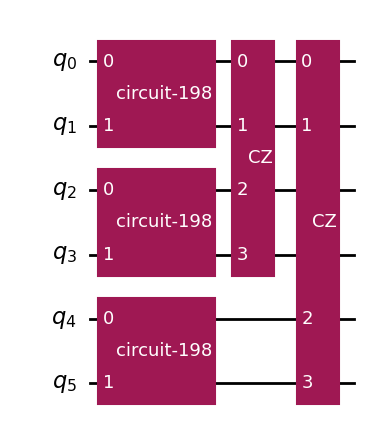

In [4]:
ghz_circ.draw('mpl')

Sprawdzic funkcje expectation value i 

In [19]:
from qiskit.quantum_info import Statevector, Operator

In [12]:
import numpy as np

In [13]:
def cartanCircuit(VCxGate, transGate):
    circ = QuantumCircuit(2, name='+')
    phi = np.arctan(1 + np.sqrt(3))



    #qubit 0 after VCx
    circ.append(transGate, [0])
    circ.append(transGate, [1])
    circ.z(0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)

    #qubit 1 after VCx
    circ.z(1)
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.p(13 * np.pi / 16, 1)
    circ.x(1)
    circ.p(9 * np.pi / 16, 1)

    circ.barrier(0)
    circ.barrier(1)

    circ.append(VCxGate.decompose(), [0, 1])


    #qubit 0
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)
    circ.z(0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)

    #qubit 1
    circ.p(15 * np.pi / 16, 1)
    circ.x(1)
    circ.p(3 * np.pi / 16, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)

    circ.append(transGate.conjugate(), [0])
    circ.append(transGate.conjugate(), [1])

    testWeyly = TwoQubitWeylDecomposition(Operator(circ).to_matrix())
    optiF = testWeyly.circuit()

    return optiF

In [15]:
from qiskit.synthesis import TwoQubitWeylDecomposition

In [17]:
pi = np.pi
sqrt = np.sqrt
log = np.log

common_log_term = log(-1 / 6 * (-1) ** (1 / 4) * (sqrt(24 - 6 * sqrt(3)) + 1j * (3 + sqrt(3))))
common_factor = 3j + 1j * sqrt(3) + sqrt(6 * (4 - sqrt(3)))
denominator = 15 * pi - 4 * 1j * common_log_term

VCx = np.array([
    [
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator),
        0,
        0,
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator)
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator),
        0,
        0,
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator)
    ]
], dtype=complex)

weylDecomCirc = TwoQubitWeylDecomposition(VCx)
VCxGate = weylDecomCirc.circuit()

In [17]:
def CZqutrit(transGate):
    circ = QuantumCircuit(4, name="CZ")

    circ.append(transGate, [0])
    circ.append(transGate, [1])
    circ.append(transGate, [2])
    circ.append(transGate, [3])
    omega = 2*np.pi/3

    circ.cp(omega, 0, 2)
    circ.cp(omega, 1, 3)
    circ.cp(-1 * omega, 0, 3)
    circ.cp(-1 * omega, 1, 2)

    circ.append(transGate.conjugate().transpose(), [0])
    circ.append(transGate.conjugate().transpose(), [1])
    circ.append(transGate.conjugate().transpose(), [2])
    circ.append(transGate.conjugate().transpose(), [3])

    return circ

In [22]:
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit import QuantumCircuit

In [23]:
basisTransformationMatrix = np.identity(2)
uniGate = UnitaryGate(basisTransformationMatrix)

In [25]:
qubitList = [[i, i + 1] for i in range(0, 8, 2)]
ame4d = QuantumCircuit(8)
for i in qubitList:
    ame4d.append(cartanCircuit(VCxGate, uniGate), i)

ame4d.append(CZqutrit(uniGate), [0, 1, 2, 3])
ame4d.append(CZqutrit(uniGate), [2, 3, 4, 5])
ame4d.append(CZqutrit(uniGate), [4, 5, 6, 7])
ame4d.append(CZqutrit(uniGate), [6, 7, 0, 1])
ame4d.append(CZqutrit(uniGate), [0, 1, 6, 7])

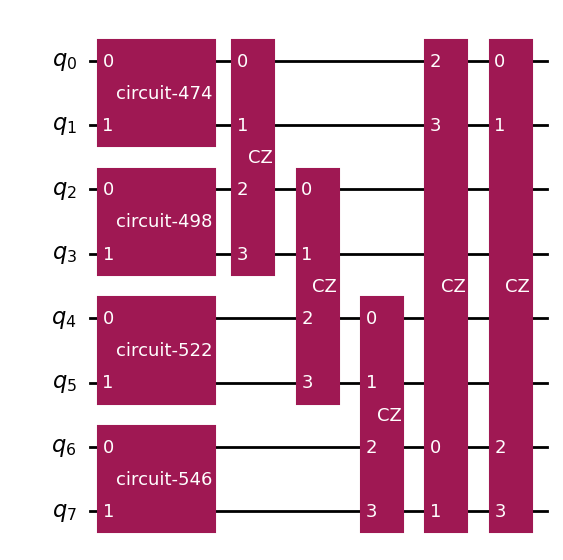

In [26]:
ame4d.draw('mpl')

In [35]:
ame4dStabi = Statevector(ame4d).expectation_value(suma)

In [36]:
ame4dStabiHerm = Statevector(ame4d).expectation_value(sumaherm)

In [38]:
ame4dStabi + ame4dStabiHerm

np.complex128(-2.375877272697835e-14-2.220446049250313e-16j)

In [15]:
from qiskit.circuit.library import UnitaryGate

In [20]:
basisTransformationMatrix = np.identity(2)
uniGate = UnitaryGate(basisTransformationMatrix)
cartanCirc = cartanCircuit(VCxGate, uniGate)

In [46]:
omega = np.exp(2*np.pi*1.j/3)
Z = np.array([[1, 0, 0, 0], [0, omega, 0, 0], [0, 0, omega*omega, 0], [0, 0, 0, 1]])
X = np.array([[0,0,1,0], [1,0,0,0], [0,1,0,0],[0,0,0,1]])

In [52]:
Zh = Z.conjugate().transpose()
Xh = X.conjugate().transpose()

In [53]:
np.dot(X, Xh)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [54]:
np.dot(Z, Zh)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [21]:
cartanH = Operator(cartanCirc).conjugate().transpose()

In [23]:
changeToDefault = cartanH.tensor(cartanH).tensor(Operator(np.identity(4))).to_matrix()

In [25]:
optiGhzState = Statevector(ghz_circ)
optiGhzMatrix = optiGhzState.data.reshape((64,1))

In [26]:
default = np.dot(changeToDefault, optiGhzMatrix)

In [27]:
Statevector(default).draw('latex')

<IPython.core.display.Latex object>

In [94]:
G1 = np.kron(X, np.kron(Z, Z)).round(3)
G2 = np.kron(Z, np.kron(X, np.identity(4)))
G3 = np.kron(Z, np.kron(np.identity(4), X))

In [72]:
ghzG1 = Statevector(default).expectation_value(G1)
ghzG2 = Statevector(default).expectation_value(G2)
ghzG3 = Statevector(default).expectation_value(G3)

In [73]:
ghzG1

np.complex128(-3.001117487303043e-17-3.9444362093469096e-17j)

In [37]:
default.round(3)

array([[-0.577-0.j],
       [-0.   -0.j],
       [-0.   -0.j],
       [ 0.   -0.j],
       [-0.   -0.j],
       [ 0.   -0.j],
       [-0.   -0.j],
       [ 0.   -0.j],
       [-0.   -0.j],
       [-0.   +0.j],
       [ 0.   +0.j],
       [ 0.   -0.j],
       [-0.   +0.j],
       [ 0.   +0.j],
       [-0.   +0.j],
       [-0.   -0.j],
       [-0.   -0.j],
       [ 0.   -0.j],
       [-0.   -0.j],
       [ 0.   -0.j],
       [-0.   -0.j],
       [-0.577-0.j],
       [-0.   -0.j],
       [ 0.   +0.j],
       [-0.   +0.j],
       [-0.   -0.j],
       [ 0.   -0.j],
       [-0.   +0.j],
       [-0.   -0.j],
       [ 0.   -0.j],
       [ 0.   +0.j],
       [-0.   -0.j],
       [-0.   -0.j],
       [ 0.   +0.j],
       [ 0.   +0.j],
       [ 0.   +0.j],
       [ 0.   +0.j],
       [-0.   -0.j],
       [ 0.   -0.j],
       [-0.   +0.j],
       [-0.   +0.j],
       [-0.   +0.j],
       [-0.577+0.j],
       [-0.   +0.j],
       [-0.   -0.j],
       [ 0.   -0.j],
       [-0.   -0.j],
       [-0.  

In [35]:
defaultH = default.conjugate().transpose()

In [60]:
np.dot(defaultH, np.dot(G1, default))

array([[1.+2.5243549e-29j]])

In [74]:
suma = ghzG1 + ghzG2 + ghzG3 + ghzG1.conjugate() + ghzG2.conjugate() + ghzG3.conjugate()

In [75]:
suma

np.complex128(1.0477301724250584e-14+0j)

In [91]:
G1h = G1.conjugate().transpose()
np.dot(G1, G1h).round(3)

array([[1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 1.+0.j]],
      shape=(64, 64))